In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [231]:
df=pd.read_csv("/content/Ecva.csv")

In [232]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,30195701,mujer,16,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46323,30195701,mujer,76,otro_pariente,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46324,30202911,hombre,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0
46325,30202911,mujer,60,pareja,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [234]:
df=df[df["parentesco_jefe_hogar"]=="jefe_hogar"]

In [235]:
df=df[["edad","ingreso_mensual_aprox","estrato","num_noches", "sexo", "estado_civil", "viaje_noche_fuera"]]

In [236]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
0,56,880000.0,1.0,NaN,mujer,soltero,no
3,39,860000.0,1.0,NaN,mujer,separado_divorciado,no
6,68,1050000.0,1.0,NaN,mujer,viudo,no
7,34,820000.0,1.0,NaN,hombre,pareja_no_union_libre,no
10,25,850000.0,1.0,NaN,hombre,pareja_union_libre,no
...,...,...,...,...,...,...,...
46305,63,9000000.0,2.0,NaN,mujer,casado,no
46309,66,828116.0,1.0,NaN,mujer,separado_divorciado,no
46316,71,5000000.0,4.0,NaN,hombre,casado,no
46320,50,3800000.0,3.0,NaN,hombre,casado,no


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14029 entries, 0 to 46324
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   14029 non-null  int64  
 1   ingreso_mensual_aprox  13793 non-null  float64
 2   estrato                14017 non-null  float64
 3   num_noches             1618 non-null   object 
 4   sexo                   14029 non-null  object 
 5   estado_civil           14029 non-null  object 
 6   viaje_noche_fuera      14029 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 876.8+ KB


In [238]:
df.head()

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
0,56,880000.0,1.0,NaN,mujer,soltero,no
3,39,860000.0,1.0,NaN,mujer,separado_divorciado,no
6,68,1050000.0,1.0,NaN,mujer,viudo,no
7,34,820000.0,1.0,NaN,hombre,pareja_no_union_libre,no
10,25,850000.0,1.0,NaN,hombre,pareja_union_libre,no


In [239]:
df.tail()

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
46305,63,9000000.0,2.0,NaN,mujer,casado,no
46309,66,828116.0,1.0,NaN,mujer,separado_divorciado,no
46316,71,5000000.0,4.0,NaN,hombre,casado,no
46320,50,3800000.0,3.0,NaN,hombre,casado,no
46324,61,4000000.0,2.0,1.0,hombre,casado,si


In [240]:
df.shape

(14029, 7)

In [241]:
df.describe()

,edad,ingreso_mensual_aprox,estrato
count,14029.000000,1.379300e+04,14017.000000
mean,50.038278,1.604475e+06,2.261540
std,16.335275,1.651129e+06,1.109295
min,15.000000,9.800000e+01,0.000000
25%,37.000000,8.000000e+05,1.000000
50%,50.000000,1.128000e+06,2.000000
75%,62.000000,2.000000e+06,3.000000
max,102.000000,3.000000e+07,9.000000


In [242]:
df.isna().sum()

edad                         0
ingreso_mensual_aprox      236
estrato                     12
num_noches               12411
sexo                         0
estado_civil                 0
viaje_noche_fuera            0
dtype: int64

In [243]:
df["ingreso_mensual_aprox"].fillna(df["ingreso_mensual_aprox"].median(),inplace=True)

In [244]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
0,56,880000.0,1.0,NaN,mujer,soltero,no
3,39,860000.0,1.0,NaN,mujer,separado_divorciado,no
6,68,1050000.0,1.0,NaN,mujer,viudo,no
7,34,820000.0,1.0,NaN,hombre,pareja_no_union_libre,no
10,25,850000.0,1.0,NaN,hombre,pareja_union_libre,no
...,...,...,...,...,...,...,...
46305,63,9000000.0,2.0,NaN,mujer,casado,no
46309,66,828116.0,1.0,NaN,mujer,separado_divorciado,no
46316,71,5000000.0,4.0,NaN,hombre,casado,no
46320,50,3800000.0,3.0,NaN,hombre,casado,no


In [245]:
df.duplicated().sum()

1972

In [246]:
df=df.drop_duplicates().reset_index(drop=True)

In [247]:
df.duplicated().sum()

0

In [248]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
0,56,880000.0,1.0,NaN,mujer,soltero,no
1,39,860000.0,1.0,NaN,mujer,separado_divorciado,no
2,68,1050000.0,1.0,NaN,mujer,viudo,no
3,34,820000.0,1.0,NaN,hombre,pareja_no_union_libre,no
4,25,850000.0,1.0,NaN,hombre,pareja_union_libre,no
...,...,...,...,...,...,...,...
12052,63,9000000.0,2.0,NaN,mujer,casado,no
12053,66,828116.0,1.0,NaN,mujer,separado_divorciado,no
12054,71,5000000.0,4.0,NaN,hombre,casado,no
12055,50,3800000.0,3.0,NaN,hombre,casado,no


In [249]:
df.replace({"viaje_noche_fuera":{"si":1,"no":0}},inplace=True)

In [250]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
0,56,880000.0,1.0,NaN,mujer,soltero,0
1,39,860000.0,1.0,NaN,mujer,separado_divorciado,0
2,68,1050000.0,1.0,NaN,mujer,viudo,0
3,34,820000.0,1.0,NaN,hombre,pareja_no_union_libre,0
4,25,850000.0,1.0,NaN,hombre,pareja_union_libre,0
...,...,...,...,...,...,...,...
12052,63,9000000.0,2.0,NaN,mujer,casado,0
12053,66,828116.0,1.0,NaN,mujer,separado_divorciado,0
12054,71,5000000.0,4.0,NaN,hombre,casado,0
12055,50,3800000.0,3.0,NaN,hombre,casado,0


In [251]:
df=df.dropna()

In [252]:
df.isna().sum()

edad                     0
ingreso_mensual_aprox    0
estrato                  0
num_noches               0
sexo                     0
estado_civil             0
viaje_noche_fuera        0
dtype: int64

In [253]:
pd.pivot_table(df,index=["sexo", "estado_civil"],
               values="viaje_noche_fuera",
               aggfunc=["mean", "count"])

mean             count
                             viaje_noche_fuera viaje_noche_fuera
sexo   estado_civil                                             
hombre casado                                1               417
       pareja_no_union_libre                 1                30
       pareja_union_libre                    1               269
       separado_divorciado                   1                63
       soltero                               1               152
       viudo                                 1                20
mujer  casado                                1                85
       pareja_no_union_libre                 1                 9
       pareja_union_libre                    1                92
       separado_divorciado                   1               212
       soltero                               1               175
       viudo                                 1                89

In [254]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
7,55,557000.0,1.0,7.0,mujer,viudo,1
19,58,99.0,3.0,4.0,mujer,pareja_union_libre,1
21,56,1000000.0,3.0,16.0,mujer,separado_divorciado,1
22,35,2600000.0,3.0,2.0,hombre,casado,1
24,55,1000000.0,3.0,6.0,mujer,soltero,1
...,...,...,...,...,...,...,...
12035,58,6000000.0,4.0,2.0,hombre,casado,1
12047,28,950000.0,3.0,2.0,hombre,soltero,1
12050,35,10000000.0,4.0,3.0,mujer,soltero,1
12051,49,2000000.0,3.0,16.0,hombre,casado,1


In [255]:
q1=df["edad"].quantile(.25) 
q3=df["edad"].quantile(.75) 
iqr=q3-q1 
lim_inf= q1-(1.5*iqr) 
lim_sup= q3+(1.5*iqr)

In [256]:
df=df[(df["edad"]<lim_sup) & (df["edad"]>lim_inf)]

In [257]:
df

,edad,ingreso_mensual_aprox,estrato,num_noches,sexo,estado_civil,viaje_noche_fuera
7,55,557000.0,1.0,7.0,mujer,viudo,1
19,58,99.0,3.0,4.0,mujer,pareja_union_libre,1
21,56,1000000.0,3.0,16.0,mujer,separado_divorciado,1
22,35,2600000.0,3.0,2.0,hombre,casado,1
24,55,1000000.0,3.0,6.0,mujer,soltero,1
...,...,...,...,...,...,...,...
12035,58,6000000.0,4.0,2.0,hombre,casado,1
12047,28,950000.0,3.0,2.0,hombre,soltero,1
12050,35,10000000.0,4.0,3.0,mujer,soltero,1
12051,49,2000000.0,3.0,16.0,hombre,casado,1


In [259]:
y=df.pop("viaje_noche_fuera")
x=sm.add_constant(df[["ingreso_mensual_aprox", "edad"]])
model = sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -805.0
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               1.00
Time:                        05:37:21   Log-Likelihood:                 53555.
No. Observations:                1613   AIC:                        -1.071e+05
Df Residuals:                    1610   BIC:                        -1.071e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0000   7.19e-17   1.39e+16      0.000       1.000       1.000
ingreso_mensual_aprox   9.59e-23   9.66e-24      9.931      0.000     7.7e-23    1.15e-22
edad                  -1.132e-18   1.43e-18     -0.790      0.429   -3.94e-18    1.68e-18
==============================================================================
Omnibus:                      931.092   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10540.708
Skew:                          -2.502   Prob(JB):                         0.00
Kurtosis:                      14.480   Cond. No.                     1.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

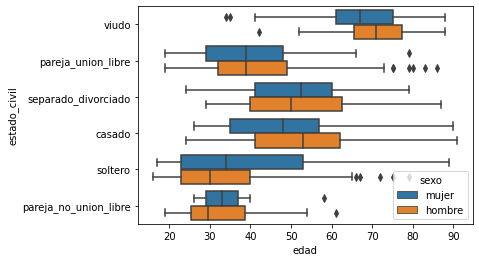

In [260]:
sns.boxplot(data=df,
            x="edad",
            y="estado_civil",
            hue="sexo")
plt.show()

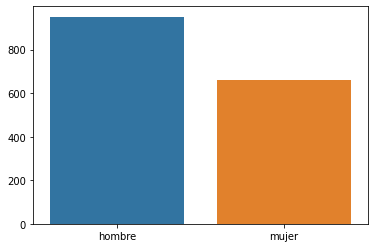

In [261]:
sexo=df["sexo"].value_counts()

sns.barplot(x=sexo.index,
            y=sexo.values)
plt.show()

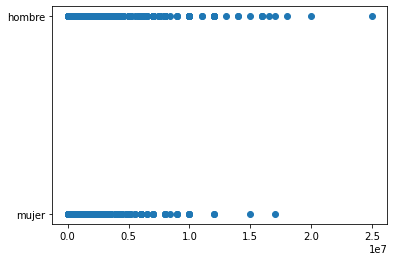

In [263]:
plt.scatter(df["ingreso_mensual_aprox"],
            df["sexo"])
plt.show()

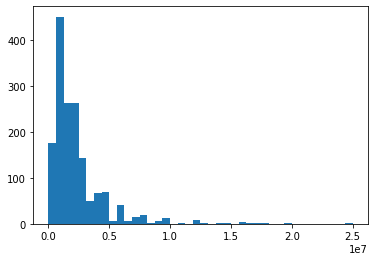

In [266]:
plt.hist(df["ingreso_mensual_aprox"],bins=40)
plt.show()

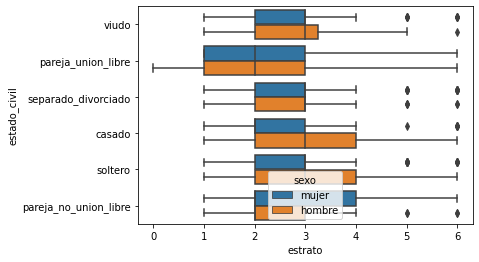

In [272]:
sns.boxplot(data=df,
            x="estrato",
            y="estado_civil",
            hue="sexo")
plt.show()